In [8]:
import pandas as pd
import datetime
from datetime import date
import numpy as np
import matplotlib as plt
import seaborn as sns

In [262]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [11]:
df = pd.read_csv("../../way-to-school-date/school_prep.csv")

In [12]:
print("Zbiór zawiera {} obserwacji i {} zmiennych".format(df.shape[0], df.shape[1]))

Zbiór zawiera 55730 obserwacji i 71 zmiennych


In [13]:
print("Lista zmiennych w zbiorze {}".format(df.columns))

Lista zmiennych w zbiorze Index(['numer_rspo', 'regon_podmiotu', 'nip_podmiotu', 'typ', 'nazwa',
       'kod_terytorialny_wojewodztwo', 'kod_terytorialny_powiat',
       'kod_terytorialny_gmina', 'kod_terytorialny_miejscowosc',
       'kod_terytorialny_ulica', 'wojewodztwo', 'powiat', 'gmina',
       'miejscowosc', 'rodzaj_miejscowosci', 'ulica', 'numer_budynku',
       'numer_lokalu', 'kod_pocztowy', 'poczta', 'telefon', 'faks', 'e-mail',
       'strona_www', 'publicznosc_status', 'kategoria_uczniow',
       'specyfika_placowki', 'imie_i_nazwisko_dyrektora', 'data_zalozenia',
       'data_rozpoczecia_dzialalnosci', 'data_likwidacji',
       'typ_organu_prowadzacego', 'nazwa_organu_prowadzacego',
       'regon_organu_prowadzacego', 'nip_organu_prowadzacego',
       'wojewodztwo_organu_prowadzacego', 'powiat_organu_prowadzacego',
       'gmina_organu_prowadzacego', 'miejsce_w_strukturze',
       'rspo_podmiotu_nadrzednego', 'typ_podmiotu_nadrzednego',
       'nazwa_podmiotu_nadrzednego'

In [14]:
print("Zbior zawiera {} duplikatow.".format(df.duplicated().sum()))

Zbior zawiera 0 duplikatow.


In [15]:
print("Zbior zawiera {} zmiennych typu float".format(len(df.select_dtypes("float64").columns)))

Zbior zawiera 12 zmiennych typu float


In [16]:
print("Zbior zawiera {} zmiennych typu int".format(len(df.select_dtypes("int64").columns)))

Zbior zawiera 20 zmiennych typu int


In [17]:
print("Zbior zawiera {} zmiennych typu object".format(len(df.select_dtypes("object").columns)))

Zbior zawiera 39 zmiennych typu object


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55730 entries, 0 to 55729
Data columns (total 71 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   numer_rspo                       55730 non-null  int64  
 1   regon_podmiotu                   55730 non-null  int64  
 2   nip_podmiotu                     28564 non-null  float64
 3   typ                              55730 non-null  object 
 4   nazwa                            55730 non-null  object 
 5   kod_terytorialny_wojewodztwo     55730 non-null  int64  
 6   kod_terytorialny_powiat          55730 non-null  int64  
 7   kod_terytorialny_gmina           55730 non-null  int64  
 8   kod_terytorialny_miejscowosc     55730 non-null  int64  
 9   kod_terytorialny_ulica           46086 non-null  float64
 10  wojewodztwo                      55730 non-null  object 
 11  powiat                           55730 non-null  object 
 12  gmina             

In [20]:
df.select_dtypes(["int", "float"]).columns

Index(['numer_rspo', 'regon_podmiotu', 'nip_podmiotu',
       'kod_terytorialny_wojewodztwo', 'kod_terytorialny_powiat',
       'kod_terytorialny_gmina', 'kod_terytorialny_miejscowosc',
       'kod_terytorialny_ulica', 'data_likwidacji',
       'regon_organu_prowadzacego', 'nip_organu_prowadzacego',
       'rspo_podmiotu_nadrzednego', 'liczba_uczniow', 'identyfikator_prov',
       'area_ha_prov', 'area_km_prov', 'population_total_prov',
       'population_per_1km_prov', 'rank_ha_prov', 'rank_population_prov',
       'identyfikator_dist', 'area_ha_dist', 'area_km_dist',
       'population_total_dist', 'population_per_1km_dist', 'rank_ha_dist',
       'rank_population_dist', 'identyfikator', 'area_ha', 'area_km',
       'population_total', 'population_per_1km'],
      dtype='object')

In [21]:
df.head(3)

,numer_rspo,regon_podmiotu,nip_podmiotu,typ,nazwa,kod_terytorialny_wojewodztwo,kod_terytorialny_powiat,kod_terytorialny_gmina,kod_terytorialny_miejscowosc,kod_terytorialny_ulica,...,rank_ha_dist,rank_population_dist,identyfikator,gminy_nazwa,area_ha,area_km,population_total,population_per_1km,rank_ha,rank_population
0,38801,650689,6.121863e+09,Szkoła podstawowa,SZKOŁA PODSTAWOWA NR 2 W BOLESŁAWCU,2,201,201011,935989,20291.0,...,64,97,201011.0,Bolesławiec....................................,2357.0,24.0,38486.0,1633.0,2207,133
1,40746,21270766,6.121833e+09,Przedszkole,MIEJSKIE PRZEDSZKOLE PUBLICZNE NR 7 Z ODDZIAŁA...,2,201,201011,935989,5956.0,...,64,97,201011.0,Bolesławiec....................................,2357.0,24.0,38486.0,1633.0,2207,133
2,17550,27192,6.121125e+09,Zespół szkół i placówek oświatowych,ZESPÓŁ SZKÓŁ ELEKTRONICZNYCH IM. I. DOMEYKI W ...,2,201,201011,935989,23260.0,...,64,97,201011.0,Bolesławiec....................................,2357.0,24.0,38486.0,1633.0,2207,133


In [22]:
# df.agg(['mean', 'median', 'count'])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
numer_rspo,55730.0,9.105552e+04,8.059559e+04,2.869000e+03,2.688150e+04,7.222700e+04,1.219508e+05,2.792130e+05
regon_podmiotu,55730.0,1.564177e+11,3.030666e+12,1.999100e+04,2.246521e+07,2.430894e+08,3.681990e+08,9.712719e+13
nip_podmiotu,28564.0,7.180181e+09,1.571380e+09,1.198970e+08,6.191914e+09,7.291405e+09,8.341037e+09,9.970157e+09
kod_terytorialny_wojewodztwo,55730.0,1.687447e+01,8.896610e+00,2.000000e+00,1.000000e+01,1.400000e+01,2.400000e+01,3.200000e+01
kod_terytorialny_powiat,55730.0,1.717044e+03,8.901736e+02,2.010000e+02,1.061000e+03,1.465000e+03,2.465000e+03,3.263000e+03
kod_terytorialny_gmina,55730.0,1.717084e+06,8.901705e+05,2.010110e+05,1.061049e+06,1.465188e+06,2.465011e+06,3.263011e+06
kod_terytorialny_miejscowosc,55730.0,7.879407e+05,2.841555e+05,4.600000e+01,6.785700e+05,9.361500e+05,9.658780e+05,1.067360e+06
kod_terytorialny_ulica,46086.0,1.659636e+04,1.067788e+04,4.000000e+00,8.986000e+03,1.572900e+04,2.197000e+04,5.823300e+04
data_likwidacji,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
regon_organu_prowadzacego,47264.0,4.899429e+10,9.775225e+11,0.000000e+00,1.916751e+08,3.650005e+08,6.312587e+08,9.510756e+13


In [162]:
print(str(round(df.isnull().any(axis=0).sum() / df.shape[0] * 100, 2)) + "% obserwacji zawiera braki w danych.")

0.03% obserwacji zawiera braki w danych.


In [24]:
nulls_summary = pd.DataFrame(df.isnull().any(), columns=["Nulls"])
nulls_summary["Num_of_nulls [qty]"] = pd.DataFrame(df.isnull().sum())
nulls_summary["Num_of_nulls [%]"] = round((df.isnull().mean() * 100), 2)
nulls_summary = nulls_summary[nulls_summary["Nulls"]]
nulls_summary.sort_values("Num_of_nulls [%]", ascending=False)

,Nulls,Num_of_nulls [qty],Num_of_nulls [%]
data_likwidacji,True,55730,100.00
numer_lokalu,True,53091,95.26
nip_organu_prowadzacego,True,45100,80.93
tereny_sportowe,True,44343,79.57
rspo_podmiotu_nadrzednego,True,39671,71.18
nazwa_podmiotu_nadrzednego,True,39671,71.18
typ_podmiotu_nadrzednego,True,39671,71.18
faks,True,31347,56.25
nip_podmiotu,True,27166,48.75
imie_i_nazwisko_dyrektora,True,20852,37.42


In [26]:
pd.crosstab(df.wojewodztwo, df.wojewodztwo_nazwa)

wojewodztwo_nazwa,Dolnośląskie,Kujawsko-pomorskie,Lubelskie,Lubuskie,Mazowieckie,Małopolskie,Opolskie,Podkarpackie,Podlaskie,Pomorskie,Warmińsko-mazurskie,Wielkopolskie,Zachodniopomorskie,Łódzkie,Śląskie,Świętokrzyskie
wojewodztwo,,,,,,,,,,,,,,,,
DOLNOŚLĄSKIE,3791,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
KUJAWSKO-POMORSKIE,0,2822,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LUBELSKIE,0,0,3205,0,0,0,0,0,0,0,0,0,0,0,0,0
LUBUSKIE,0,0,0,1390,0,0,0,0,0,0,0,0,0,0,0,0
MAZOWIECKIE,0,0,0,0,7935,0,0,0,0,0,0,0,0,0,0,0
MAŁOPOLSKIE,0,0,0,0,0,5458,0,0,0,0,0,0,0,0,0,0
OPOLSKIE,0,0,0,0,0,0,1544,0,0,0,0,0,0,0,0,0
PODKARPACKIE,0,0,0,0,0,0,0,3487,0,0,0,0,0,0,0,0
PODLASKIE,0,0,0,0,0,0,0,0,1646,0,0,0,0,0,0,0


In [28]:
black_list = [
    "data_likwidacji",
    "nip_podmiotu",
    "faks",
    "imie_i_nazwisko_dyrektora",
    "nip_organu_prowadzacego",
    "wojewodztwo_nazwa",
    "identyfikator",
    "gminy_nazwa",
    "area_ha",
    "area_km",
    "population_total",
    "population_per_1km",
    "rank_ha",
    "rank_population",
    "identyfikator_prov",
    "powiaty_nazwa",
]

for i in black_list:
    if i in df.columns:
        df.drop(i, axis=1, inplace=True)

In [29]:
col = df.select_dtypes("object").columns

In [30]:
for x in col:
    print("{}: {} unikalnych wartości.".format(x, df[x].nunique()))

typ: 53 unikalnych wartości.
nazwa: 51158 unikalnych wartości.
wojewodztwo: 16 unikalnych wartości.
powiat: 370 unikalnych wartości.
gmina: 3084 unikalnych wartości.
miejscowosc: 8661 unikalnych wartości.
rodzaj_miejscowosci: 11 unikalnych wartości.
ulica: 7172 unikalnych wartości.
numer_budynku: 2223 unikalnych wartości.
numer_lokalu: 480 unikalnych wartości.
kod_pocztowy: 8499 unikalnych wartości.
poczta: 4213 unikalnych wartości.
telefon: 36066 unikalnych wartości.
e-mail: 35917 unikalnych wartości.
strona_www: 26715 unikalnych wartości.
publicznosc_status: 5 unikalnych wartości.
kategoria_uczniow: 3 unikalnych wartości.
specyfika_placowki: 2 unikalnych wartości.
data_zalozenia: 10566 unikalnych wartości.
data_rozpoczecia_dzialalnosci: 6840 unikalnych wartości.
typ_organu_prowadzacego: 28 unikalnych wartości.
nazwa_organu_prowadzacego: 13967 unikalnych wartości.
wojewodztwo_organu_prowadzacego: 16 unikalnych wartości.
powiat_organu_prowadzacego: 370 unikalnych wartości.
gmina_organu

In [31]:
for x in col:
    if df[x].nunique() <= 53:
        df[x] = df[x].astype("category")

In [32]:
for x in df.select_dtypes("int64").columns:
    if df[x].max() <= 127:
        print("{}: max {}".format(x, df[x].max()))
    elif df[x].max() <= 32767:
        print("{}: max {}".format(x, df[x].max()))

kod_terytorialny_wojewodztwo: max 32
kod_terytorialny_powiat: max 3263
population_per_1km_prov: max 364
rank_ha_prov: max 16
rank_population_prov: max 16
identyfikator_dist: max 3263
area_km_dist: max 2975
population_per_1km_dist: max 3690
rank_ha_dist: max 313
rank_population_dist: max 313


In [33]:
for x in df.select_dtypes("int64").columns:
    if df[x].max() <= 127:
        df[x] = df[x].astype("int8")
    elif df[x].max() <= 32767:
        df[x] = df[x].astype("int16")
    elif df[x].max() <= 2147483647:
        df[x] = df[x].astype("int32")

In [34]:
df.shape

(55730, 55)

In [44]:
# df['data_rozpoczecia_dzialalnosci']  =  pd.to_datetime(df['data_rozpoczecia_dzialalnosci'], errors = 'coerce')
# df['data_zalozenia']  =  pd.to_datetime(df['data_zalozenia'], errors = 'coerce')

In [45]:
df.select_dtypes("object").columns

Index(['nazwa', 'powiat', 'gmina', 'miejscowosc', 'ulica', 'numer_budynku',
       'numer_lokalu', 'kod_pocztowy', 'poczta', 'telefon', 'e-mail',
       'strona_www', 'data_zalozenia', 'data_rozpoczecia_dzialalnosci',
       'nazwa_organu_prowadzacego', 'powiat_organu_prowadzacego',
       'gmina_organu_prowadzacego', 'nazwa_podmiotu_nadrzednego',
       'tereny_sportowe', 'jezyki_nauczane', 'gmina_cat'],
      dtype='object')

# Mapowanie typ_szkoly

In [52]:
dict_typ = {
    "Szkoła podstawowa": "Szkoła podstawowa",
    "Przedszkole": "Przedszkole",
    "Liceum ogólnokształcące": "Liceum ogólnokształcące",
    "Placówka Kształcenia Ustawicznego - bez szkół": "Other",
    "Szkoła policealna": "Other",
    "Branżowa szkoła I stopnia": "Branżowa szkoła I stopnia",
    "Technikum": "Technikum",df_agg_dist.sort_values(by="school_count_area", ascending=True)[:10]
    "Szkoła specjalna przysposabiająca do pracy": "Other",
    "Szkoła muzyczna I stopnia": "Szkoła muzyczna I stopnia",
    "Branżowa szkoła II stopnia": "Branżowa szkoła II stopnia",
    "Placówka doskonalenia nauczycieli": "Other",
    "Niepubliczna placówka oświatowo-wychowawcza w systemie oświaty": "Other",
    "Specjalny Ośrodek Szkolno-Wychowawczy": "Other",
    "Zespół szkół i placówek oświatowych": "Zespół szkół i placówek oświatowych",
    "Szkolne schronisko młodzieżowe": "Other",
    "Biblioteki pedagogiczne": "Other",
    "Ośrodek Rewalidacyjno-Wychowawczy": "Other",
    "Bursa": "Other",
    "Szkoła muzyczna II stopnia": "Szkoła muzyczna II stopnia",
    "Placówka Kształcenia Ustawicznego ze szkołami": "Placówka Kształcenia Ustawicznego ze szkołami",
    "Młodzieżowy dom kultury": "Other",
    "Młodzieżowy Ośrodek Wychowawczy": "Other",
    "Niepubliczna placówka kształcenia ustawicznego i praktycznego": "Niepubliczna placówka kształcenia ustawicznego i praktycznego",
    "Młodzieżowy Ośrodek Socjoterapii ze szkołami": "Młodzieżowy Ośrodek Socjoterapii ze szkołami",
    "Zespół wychowania przedszkolnego": "Przedszkole",
    "Liceum sztuk plastycznych": "Liceum sztuk plastycznych",
    "Poradnia specjalistyczna": "Other",
    "Ogólnokształcąca szkoła muzyczna I stopnia": "Ogólnokształcąca szkoła muzyczna I stopnia",
    "Ognisko pracy pozaszkolnej": "Other",
    "Międzyszkolny ośrodek sportowy": "Other",
    "Placówki artystyczne (ognisko artystyczne)": "Other",
    "Policealna szkoła plastyczna": "Other",
    "Ogólnokształcąca szkoła muzyczna II stopnia": "Ogólnokształcąca szkoła muzyczna II stopnia",
    "Specjalny Ośrodek Wychowawczy": "Other",
    "Dom wczasów dziecięcych": "Other",
    "Pozaszkolna placówka specjalistyczna": "Other",
    "Ogólnokształcąca szkoła sztuk pięknych": "Ogólnokształcąca szkoła sztuk pięknych",
    "Pałac młodzieży": "Other",
    "Szkoła sztuki tańca": "Szkoła sztuki tańca",
    "Inna szkoła artystyczna": "Inna szkoła artystyczna",
    "Policealna szkoła muzyczna": "Other",
    "Ogród jordanowski": "Other",
    "Gimnazjum": "Gimnazium",
    "Ogólnokształcąca szkoła baletowa": "Ogólnokształcąca szkoła baletowa",
    "Kolegium Pracowników Służb Społecznych": "Other",
    "Niepubliczna placówka kształcenia ustawicznego i praktycznego ze szkołami": "Otheer",
    "Centrum Kształcenia Praktycznego": "Other",
    "Poznańska szkoła chóralna": "Poznańska szkoła chóralna",
    "Szkoła sztuki cyrkowej": "Szkoła sztuki cyrkowej",
    "Bednarska Szkoła Realna": "Bednarska Szkoła Realna",
}

In [53]:
df["typ_cat"] = df["typ"].map(dict_typ)
df["typ_cat"] = df["typ_cat"].astype('category')

In [54]:
pd.DataFrame(df["typ_cat"].value_counts())

,typ_cat
Przedszkole,15549
Szkoła podstawowa,14461
Other,10611
Zespół szkół i placówek oświatowych,5245
Liceum ogólnokształcące,4142
Branżowa szkoła I stopnia,2138
Technikum,2006
Szkoła muzyczna I stopnia,487
Branżowa szkoła II stopnia,420
Szkoła muzyczna II stopnia,139


## Mapowanie rodzaj_miejscowosci

In [59]:
df.rodzaj_miejscowosci.value_counts()

miasto                      31405
wieś                        17333
delegatura                   3813
dzielnica m.st. Warszawy     2607
osada                         335
część miejscowości             91
kolonia                        87
przysiółek                     21
osada leśna                    20
osiedle                        13
część miasta                    5
Name: rodzaj_miejscowosci, dtype: int64

In [60]:
df[df.rodzaj_miejscowosci == 'część miejscowości'][['gmina_typ']].value_counts()

gmina_typ     
gmina wiejska     75
obszar wiejski    16
Szczecińska        0
delegatura         0
dzielnica          0
gmina miejska      0
miasto             0
dtype: int64

In [61]:
df[df.rodzaj_miejscowosci == 'delegatura'][['gmina_typ','miejscowosc']].value_counts()

gmina_typ   miejscowosc         
delegatura  Kraków-Podgórze         379
            Kraków-Śródmieście      342
            Poznań-Stare Miasto     288
            Kraków-Krowodrza        253
            Wrocław-Krzyki          253
            Kraków-Nowa Huta        244
            Wrocław-Fabryczna       237
            Poznań-Grunwald         229
            Łódź-Bałuty             210
            Łódź-Śródmieście        194
            Poznań-Nowe Miasto      165
            Łódź-Górna              164
            Wrocław-Stare Miasto    152
            Łódź-Polesie            138
            Poznań-Jeżyce           135
            Łódź-Widzew             120
            Wrocław-Psie Pole       117
            Wrocław-Śródmieście     110
            Poznań-Wilda             83
dtype: int64

In [62]:
wieś = ['wieś', 'kolonia', 'osada','przysiółek','osada leśna', 'część miejscowości']
df['rodzaj_miejscowosci'] = df['rodzaj_miejscowosci'].map(lambda x: 'wieś' if x in wieś else x)

In [63]:
miasto = ['część miasta', 'osiedle','dzielnica m.st. Warszawy','miasto', 'delegatura']

df['rodzaj_miejscowosci'] = df['rodzaj_miejscowosci'].map(lambda x: 'miasto' if x in miasto else x)

In [309]:
df.rodzaj_miejscowosci = df.rodzaj_miejscowosci.astype('category')

In [64]:
df.rodzaj_miejscowosci.value_counts(normalize=True)

miasto    0.679042
wieś      0.320958
Name: rodzaj_miejscowosci, dtype: float64

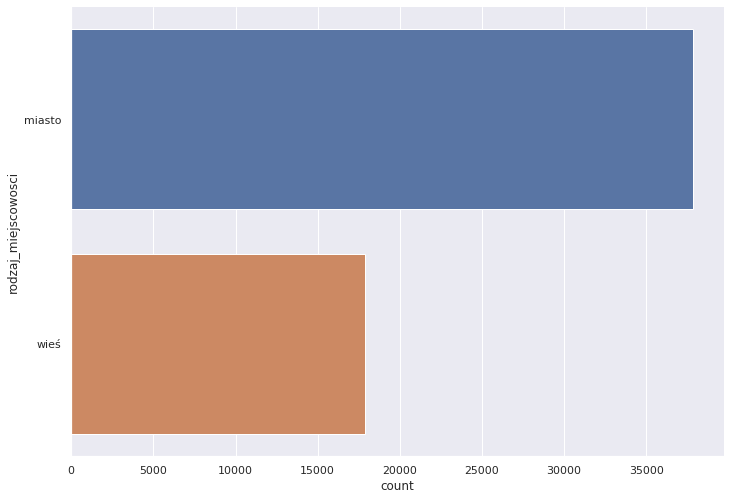

In [346]:
sns.countplot(y='rodzaj_miejscowosci', data=df);
sns.despine()

# Mapowanie publicznosc_status

In [306]:
df.publicznosc_status.dtype

dtype('O')

In [65]:
df.publicznosc_status.value_counts()

publiczna                                                                         37875
niepubliczna                                                                      17536
niepubliczna szkoła artystyczna bez uprawnień publicznej szkoły artystycznej        152
niepubliczna szkoła artystyczna o uprawnieniach publicznej szkoły artystycznej      137
niepubliczna bez uprawnień szkoły publicznej                                         30
Name: publicznosc_status, dtype: int64

In [66]:
df['publicznosc_status'] = df['publicznosc_status'].map(lambda x: 'niepubliczna' if 'niepubliczna' in x else x)

In [307]:
df['publicznosc_status'] = df['publicznosc_status'].astype('category')

In [308]:
df.publicznosc_status.value_cbounts(normalize=True)

publiczna       0.679616
niepubliczna    0.320384
Name: publicznosc_status, dtype: float64

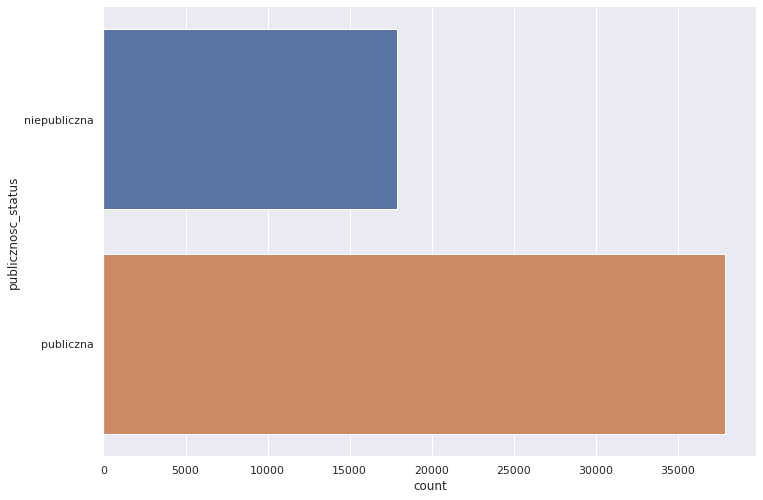

In [345]:
sns.countplot(y='publicznosc_status', data=df);
sns.despine()

# Mapowanie miejsce_w_strukturze

In [304]:
df.miejsce_w_strukturze.dtype

dtype('O')

In [68]:
df.miejsce_w_strukturze.value_counts()

samodzielna                                             33662
szkoła/placówka w zespole                               13606
zespół                                                   5245
szkoła/placówka wchodząca w skład jednostki złożonej     1640
jednostka złożona                                         654
filia szkoły lub placówki                                 551
szkoła lub placówka z filią                               372
Name: miejsce_w_strukturze, dtype: int64

In [69]:
df.miejsce_w_strukturze = df.misns.countplot(y='miejsce_w_strukturze', data=df);
sns.despine()ejsce_w_strukturze.map(lambda x: x if x == 'samodzielna' else 'zespół/filia')

In [305]:
df.miejsce_w_strukturze = df.miejsce_w_strukturze.astype('category')

In [70]:
df.miejsce_w_strukturze.value_counts(normalize=True)

samodzielna     0.604019
zespół/filia    0.395981
Name: miejsce_w_strukturze, dtype: float64

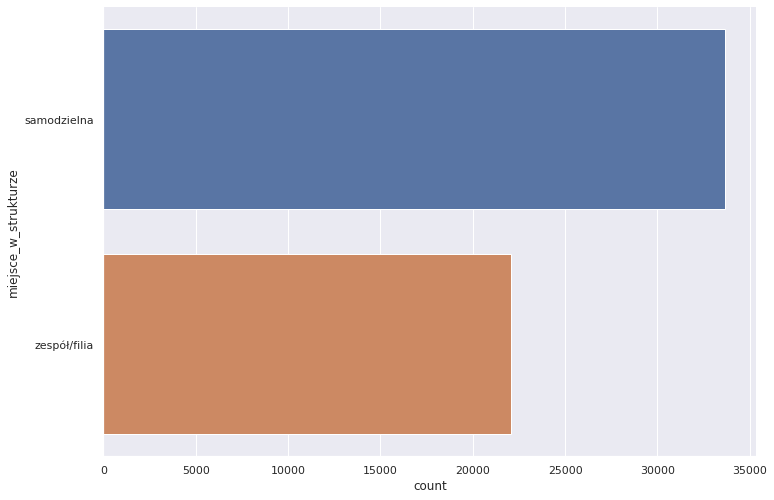

In [344]:
sns.countplot(y='miejsce_w_strukturze', data=df);
sns.despine()

# Mapowanie typ_organu_prowadzacego

In [302]:
df.typ_organu_prowadzacego.dtypes

dtype('O')

In [71]:
df.typ_organua_prowadzacego.value_counts()

Gmina                                                     17650
Miasto na prawach powiatu                                  8736
Osoba fizyczna                                             8185
Powiat ziemski                                             7992
Spółki Handlowe                                            4288
Stowarzyszenia                                             3608
Fundacje                                                   1435
Organizacje Wyznaniowe                                      949
Samorząd województwa                                        713
Minister ds. kultury i dziedzictwa narodowego               502
Przedsiębiorstwa Osób Fizycznych                            488
Osoba Fizyczna - Pracodawca                                 283
Minister ds. rolnictwa i rozwoju wsi                        275
Uczelnia Niepubliczna                                       148
Minister ds. sprawiedliwości                                119
Organizacje Społeczne inne niż wymienion

In [72]:
df.typ_organu_prowadzacego = df.typ_organu_prowadzacego.map(lambda x: 'Ministerstwo' if 'Minister' in x else x)

In [73]:
df.typ_organu_prowadzacego = df.typ_organu_prowadzacego.map(lambda x: 'Samorząd' if 'Samorząd' in x else x)
df.typ_organu_prowadzacego = df.typ_organu_prowadzacego.map(lambda x: 'Uczelnia' if 'Uczelnia' in x else x)
df.typ_organu_prowadzacego = df.typ_organu_prowadzacego.map(lambda x: 'Organizacje' if 'Organizacje' in x else x)
df.typ_organu_prowadzacego = df.typ_organu_prowadzacego.map(lambda x: 'Osoba fizyczna' if 'Osoba Fizyczna' in x else x)
df.typ_organu_prowadzacego = df.typ_organu_prowadzacego.map(lambda x: 'Przedsiębiorstwa/Izby/Spoldzielnie/Uczelnia' if 'Przedsiębiorstw' in x or 'Izba' in x or 'Spółdzielnia' in x or 'Uczelnia' in x else x)

In [303]:
df.typ_organu_prowadzacego = df.typ_organu_prowadzacego.astype('category')

In [74]:
df.typ_organu_prowadzacego.value_counts(normalize=True)

Gmina                                          0.316706
Miasto na prawach powiatu                      0.156756
Osoba fizyczna                                 0.151947
Powiat ziemski                                 0.143406
Spółki Handlowe                                0.076942
Stowarzyszenia                                 0.064741
Fundacje                                       0.025749
Organizacje                                    0.018949
Ministerstwo                                   0.016759
Przedsiębiorstwa/Izby/Spoldzielnie/Uczelnia    0.014283
Samorząd                                       0.013763
Name: typ_organu_prowadzacego, dtype: float64

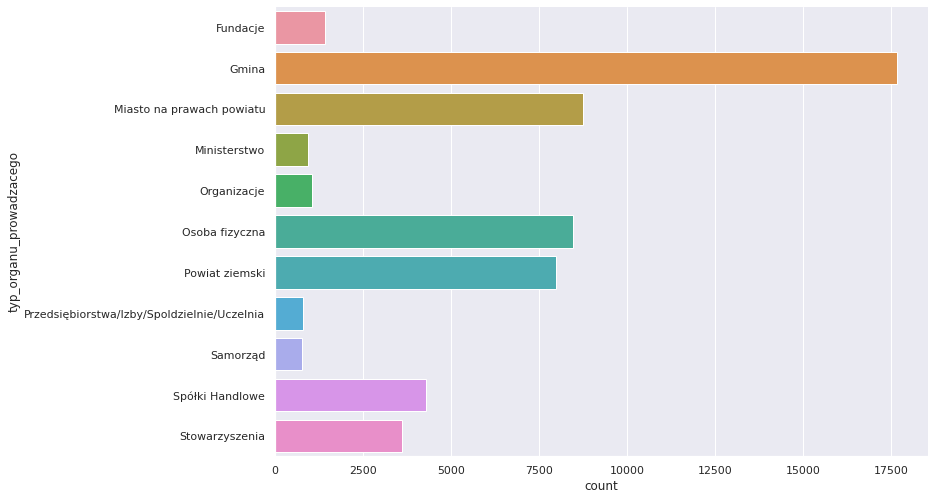

In [343]:
sns.countplot(y='typ_organu_prowadzacego', data=df);
sns.despine()

# Mapowanie gmina_typ

In [75]:
df.gmina_typ.value_counts()

gmina miejska     22938
gmina wiejska     13115
miasto             8472
obszar wiejski     4761
delegatura         3813
dzielnica          2607
Szczecińska          24
Name: gmina_typ, dtype: int64

In [76]:
df[df['gmina_typ'] == 'Szczecińska '][['miejscowosc','gmina']]

,miejscowosc,gmina
4616,Bezrzecze,Dobra (Szczecińska) (gmina wiejska)
4617,Bezrzecze,Dobra (Szczecińska) (gmina wiejska)
4618,Bezrzecze,Dobra (Szczecińska) (gmina wiejska)
4619,Bezrzecze,Dobra (Szczecińska) (gmina wiejska)
4620,Bezrzecze,Dobra (Szczecińska) (gmina wiejska)
4621,Bezrzecze,Dobra (Szczecińska) (gmina wiejska)
4622,Dobra,Dobra (Szczecińska) (gmina wiejska)
4623,Dobra,Dobra (Szczecińska) (gmina wiejska)
4624,Dołuje,Dobra (Szczecińska) (gmina wiejska)
4625,Dołuje,Dobra (Szczecińska) (gmina wiejska)


In [77]:
df['gmina_typ'] = df['gmina_typ'].map(lambda x: 'gmina wiejska' if 'Szczecińska' in x else x)

In [78]:
df['gmina_typ'] = df['gmina_typ'].map(lambda x: 'miasto' if 'delegatura' in x else x)
df['gmina_typ'] = df['gmina_typ'].map(lambda x: 'miasto' if 'dzielnica' in x else x)
df['gmina_typ'] = df['gmina_typ'].map(lambda x: 'gmina wiejska' if 'obszar wiejski' in x else x)

In [79]:
df.gmina_typ.value_counts(normalize=True)

gmina miejska    0.411592
gmina wiejska    0.321191
miasto           0.267217
Name: gmina_typ, dtype: float64

In [296]:
df.gmina_typ = df.gmina_typ.astype('category')

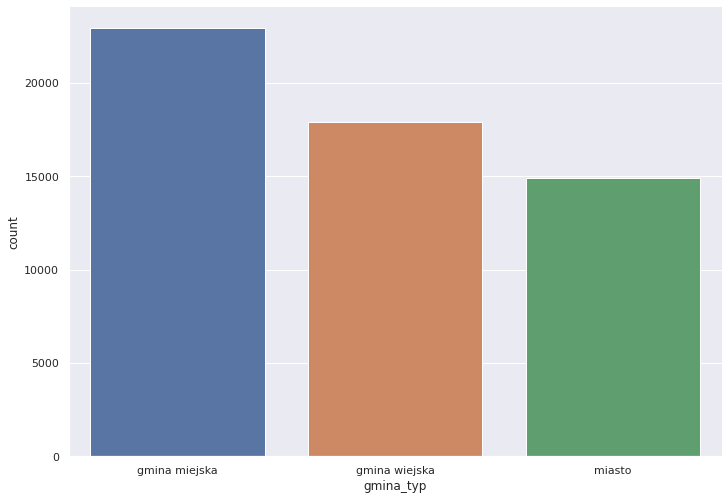

In [329]:
sns.countplot(x='gmina_typ', data=df);
sns.despine()

In [185]:
lista_ = [ 'rodzaj_miejscowosci', 'publicznosc_status',
       'kategoria_uczniow', 'specyfika_placowki', 'typ_organu_prowadzacego',
       'miejsce_w_strukturze',
        'gmina_typ','typ_cat']
for col in lista_:
    print('{}'.format(df[col].value_counts(normalize=True)))

miasto    0.679042
wieś      0.320958
Name: rodzaj_miejscowosci, dtype: float64
publiczna       0.679616
niepubliczna    0.320384
Name: publicznosc_status, dtype: float64
Dzieci lub młodzież    0.668886
Bez kategorii          0.302512
Dorośli                0.028602
Name: kategoria_uczniow, dtype: float64
brak specyfiki    0.953975
specjalna         0.046025
Name: specyfika_placowki, dtype: float64
Gmina                                          0.316706
Miasto na prawach powiatu                      0.156756
Osoba fizyczna                                 0.151947
Powiat ziemski                                 0.143406
Spółki Handlowe                                0.076942
Stowarzyszenia                                 0.064741
Fundacje                                       0.025749
Organizacje                                    0.018949
Ministerstwo                                   0.016759
Przedsiębiorstwa/Izby/Spoldzielnie/Uczelnia    0.014283
Samorząd                              

In [186]:
df.kategoria_uczniow.value_counts()

Dzieci lub młodzież    37277
Bez kategorii          16859
Dorośli                 1594
Name: kategoria_uczniow, dtype: int64

In [83]:
df[['kategoria_uczniow', 'typ_cat']].value_counts().sort_values()

kategoria_uczniow    typ_cat                                                      
Bez kategorii        Szkoła sztuki cyrkowej                                               1
                     Poznańska szkoła chóralna                                            1
Dzieci lub młodzież  Bednarska Szkoła Realna                                              1
Dorośli              Technikum                                                            1
                     Gimnazium                                                            1
                     Branżowa szkoła I stopnia                                            2
Bez kategorii        Otheer                                                               2
                     Ogólnokształcąca szkoła baletowa                                     5
Dzieci lub młodzież  Gimnazium                                                            7
Bez kategorii        Inna szkoła artystyczna                                             

# Wiek szkoły

In [164]:
df["rok_zalozenia_cat"] = df["data_zalozenia"].map(lambda x: x.split("-")[0])
df["rok_zalozenia_cat"] = df["rok_zalozenia_cat"].astype("int")

In [165]:
rok_biezacy = date.today().year

df["school_age"] = int(rok_biezacy) - df["rok_zalozenia_cat"]

In [166]:
print(
    "Liczba szkół i placowek oświatowych mających ponad 100 lat: {}".format(
        df[df.school_age > 100]["numer_rspo"].count()
    )
)

Liczba szkół i placowek oświatowych mających ponad 100 lat: 1629


In [181]:
df.nlargest(5, columns="school_age", keep="first")[
    ["typ", "nazwa", "school_age", "data_zalozenia", "wojewodztwo", "miejscowosc"]
]


,typ,nazwa,school_age,data_zalozenia,wojewodztwo,miejscowosc
8063,Placówka Kształcenia Ustawicznego - bez szkół,FEDERACJA STOWARZYSZEŃ NAUKOWO- TECHNICZNYCH N...,440,1582-01-01,WIELKOPOLSKIE,Piła
10312,Liceum ogólnokształcące,LICEUM OGÓLNOKSZTAŁCĄCE ŚW. MARII MAGDALENY,440,1582-01-01,WIELKOPOLSKIE,Poznań
25097,Szkoła podstawowa,SZKOŁA PODSTAWOWA W BRAŃSKU,440,1582-01-01,PODLASKIE,Brańsk
31364,Szkoła podstawowa,SZKOŁA PODSTAWOWA W RZEGNOWIE,440,1582-01-01,MAZOWIECKIE,Rzęgnowo
35704,Szkoła podstawowa,SZKOŁA PODSTAWOWA NR 293 IM. JANA KOCHANOWSKIEGO,440,1582-01-01,MAZOWIECKIE,Bielany


In [169]:
age_max = df["school_age"].max()

step = 25


def prep(x):

    diff = range(0, age_max, step)
    for i in diff:
        if x >= i and x < i + step:
            return i

df["school_age_map"] = df["school_age"].map(prep)

df["school_age_map"] = df["school_age"].map(lambda x: 150 if x >= 150 else x)

In [188]:
school_avg_age = df.school_age.mean()
print("średni wiek szkoly: {}".fogidrmat(round(school_avg_age, 2)))

średni wiek szkoly: 28.47


/home/magdalena/Dokumenty/way-to-school/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


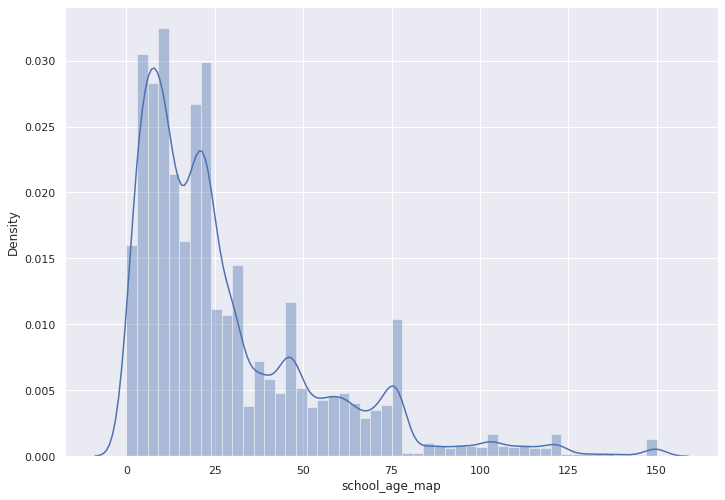

In [261]:
sns.distplot(df['school_age_map']);

/home/magdalena/Dokumenty/way-to-school/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


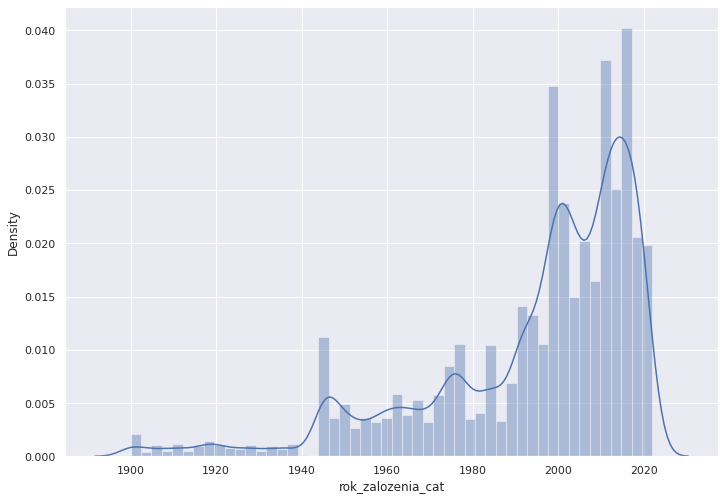

In [267]:
sns.distplot(df[df['rok_zalozenia_cat']>=1900]['rok_zalozenia_cat']);

# Szkoły wg wojewodztwa

In [349]:

df_agg_prov = (
    df.groupby(["wojewodztwo"])
    .agg(
        
        school_count=("numer_rspo", lambda x: len(set(x))), area_ha_prov=("area_ha_prov", "max"), area_km_prov=("area_km_prov", "max"),
        powiat_count=("powiat", lambda x: len(set(x))), gmina_count=("gmina",lambda x: len(set(x))),
        population_total=("population_total_prov", "max"),population_per_km = ("population_per_1km_prov",'max'),
        school_mean_age = ('school_age', 'mean')
    )
    .reset_index()
)


In [350]:
df_agg_prov["school_count_km"] = df_agg_prov["school_count"] / df_agg_prov["area_km_prov"]
df_agg_prov["school_km_population_km"] = df_agg_prov["school_count_km"] / df_agg_prov["population_per_km"] 


df_agg_prov.sort_values(by="school_count_km", ascending=False)

,wojewodztwo,school_count,area_ha_prov,area_km_prov,powiat_count,gmina_count,population_total,population_per_km,school_mean_age,school_count_km,school_km_population_km
14,ŚLĄSKIE,6133,1233309,12333,36,190,4492330,364,28.900701,0.497284,0.001366
5,MAŁOPOLSKIE,5458,1518279,15183,22,232,3410441,225,32.219311,0.359481,0.001598
4,MAZOWIECKIE,7935,3555847,35559,42,389,5425028,153,26.887461,0.223150,0.001458
7,PODKARPACKIE,3487,1784576,17846,25,194,2121229,119,36.847433,0.195394,0.001642
0,DOLNOŚLĄSKIE,3791,1994670,19947,30,227,2891321,145,24.389871,0.190054,0.001311
13,ŁÓDZKIE,3401,1821895,18219,24,212,2437970,134,28.473096,0.186673,0.001393
9,POMORSKIE,3345,1832368,18323,20,140,2346671,128,24.469357,0.182557,0.001426
11,WIELKOPOLSKIE,5254,2982650,29826,35,325,3496450,117,28.143319,0.176155,0.001506
15,ŚWIĘTOKRZYSKIE,1981,1171050,11710,14,141,1224626,105,26.399293,0.169172,0.001611
6,OPOLSKIE,1544,941187,9412,12,102,976774,104,26.584197,0.164046,0.001577


In [276]:
school_mean = df_agg_prov.school_count.mean()
print('średnia ilosc szkół wg province: {}'.format(round(school_mean,0)))

średnia ilosc szkół wg province: 3483.0


In [215]:
df['school_mean'] = school_mean

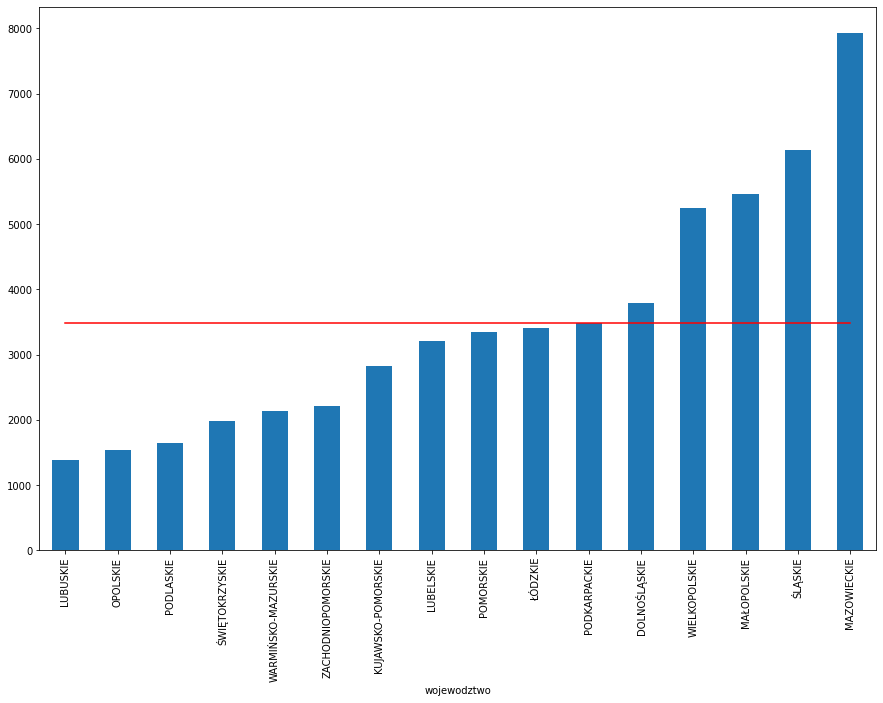

In [247]:
ax = plt.gca()
df.groupby(['wojewodztwo'])['school_mean'].max().transpose().plot(x= 'school_mean', y ='wojewodztwo', kind = 'line', figsize = (15,10), ax=ax, color='red')
df.groupby(['wojewodztwo'])['numer_rspo'].count().sort_values(ascending=True).plot(kind = 'bar', figsize = (15,10), ax=ax)
plt.show();

In [379]:
df['school_mean_age'] = df.school_age.mean()

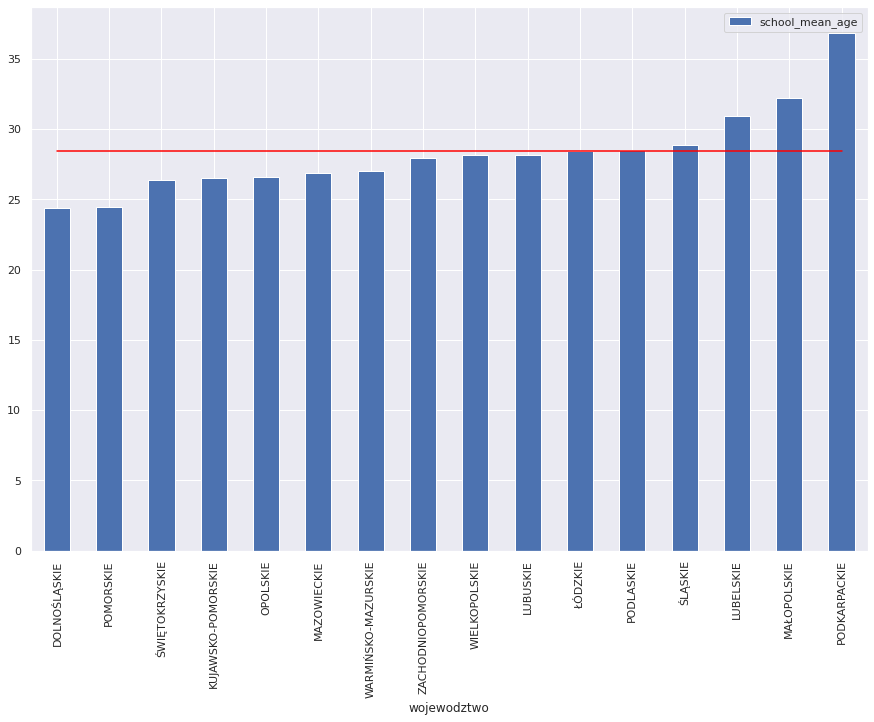

In [381]:
ax = plt.gca()
df.groupby(['wojewodztwo'])['school_mean_age'].max().plot(x= 'school_mean_age', y ='wojewodztwo', kind = 'line', figsize = (15,10), ax=ax, color='red')
df_agg_prov[['wojewodztwo', 'school_mean_age']].sort_values(by = 'school_mean_age', ascending=True).plot(x='wojewodztwo',y='school_mean_age',kind = 'bar', figsize = (15,10), ax=ax)
plt.show();

In [310]:
df.select_dtypes('category').columns

Index(['typ', 'wojewodztwo', 'rodzaj_miejscowosci', 'publicznosc_status',
       'kategoria_uczniow', 'specyfika_placowki', 'typ_organu_prowadzacego',
       'wojewodztwo_organu_prowadzacego', 'miejsce_w_strukturze',
       'typ_podmiotu_nadrzednego', 'gmina_typ', 'typ_cat'],
      dtype='object')

In [312]:
def prep_wykres_per_prov(typ):
    df_agg_prov_specyfika = (
        df.groupby(["wojewodztwo",typ])
        .agg(
            
            school_count=("numer_rspo", lambda x: len(set(x)))
        )
        .reset_index()
    )

    sns.barplot(x='school_count',y='wojewodztwo',data=df_agg_prov_specyfika, hue=typ);


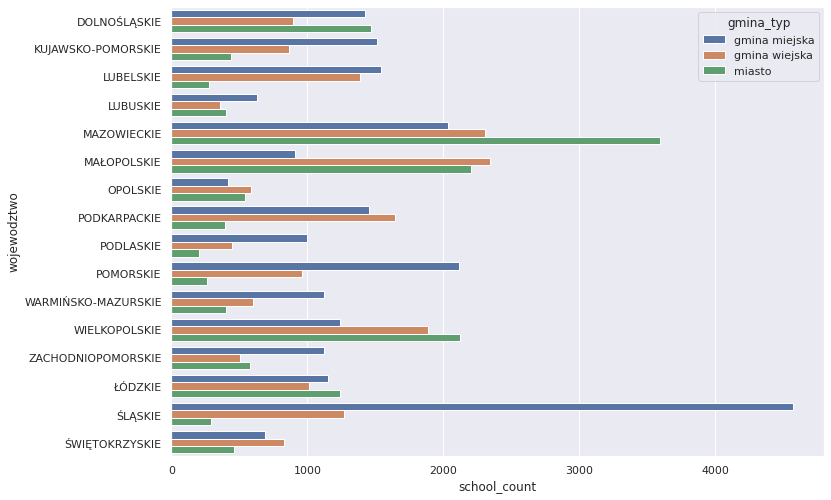

In [323]:
prep_wykres_per_prov('gmina_typ')

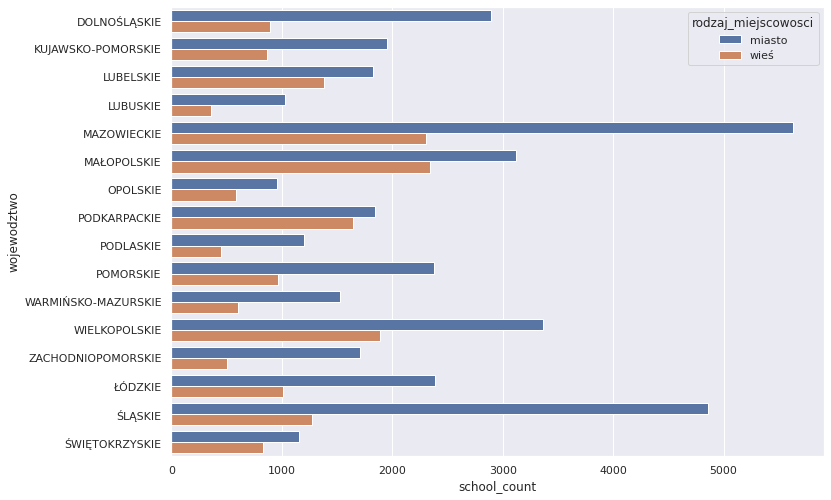

In [317]:
prep_wykres_per_prov('rodzaj_miejscowosci')

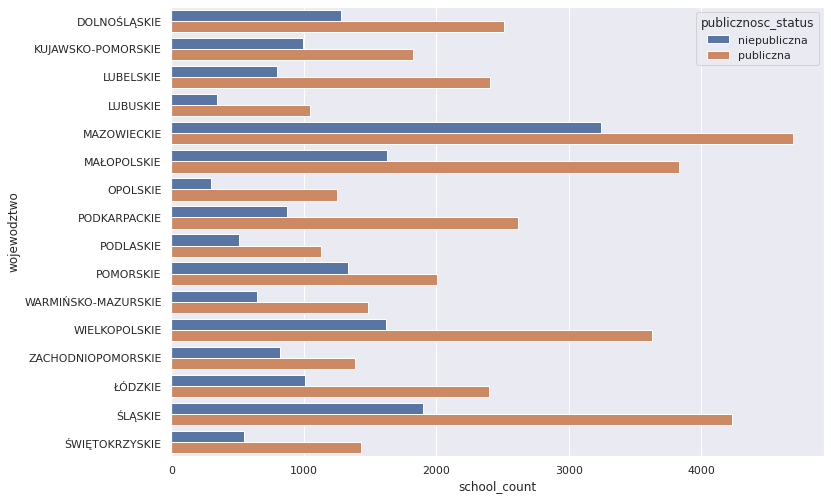

In [318]:
prep_wykres_per_prov('publicznosc_status')

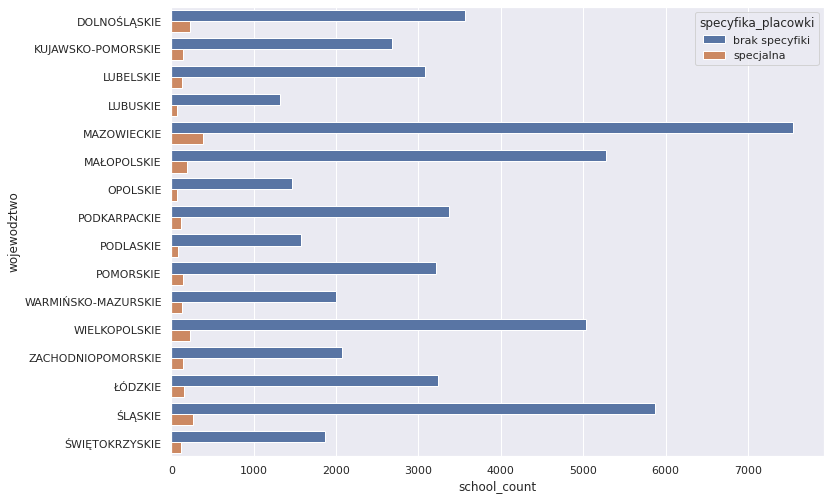

In [320]:
prep_wykres_per_prov('specyfika_placowki')

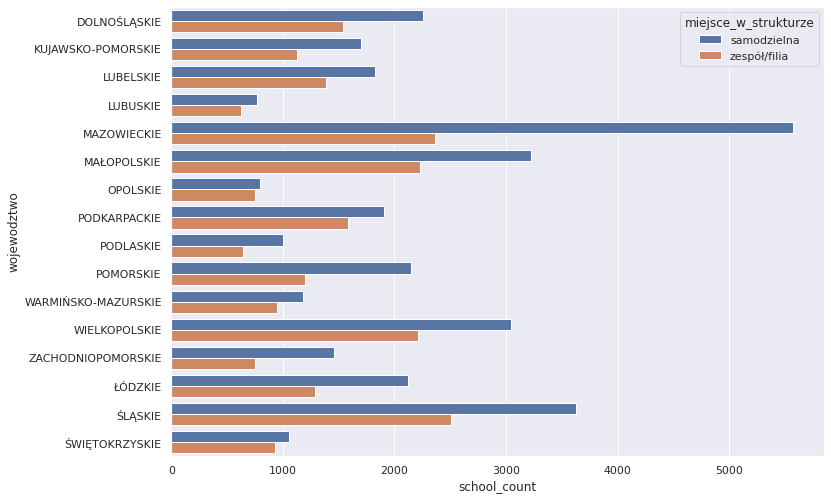

In [322]:
prep_wykres_per_prov('miejsce_w_strukturze')

# Powiaty

In [252]:
df_agg_dist = (
    df.groupby(["powiat", "wojewodztwo"])
    .agg(
        school_count=("numer_rspo", lambda x: len(set(x))), area_ha_prov=("area_ha_prov", "max"), area_km_prov=("area_km_prov", "max"),
        area_km_dist=("area_km_dist", "max"),
        gmina_count=("gmina",lambda x: len(set(x))),
        population_total_prov=("population_total_prov", "max"),population_per_km_prov = ("population_per_1km_prov",'max'),
        population_total_dist=("population_total_dist", "max"),population_per_km_dist = ("population_per_1km_dist",'max')
    )
    .reset_index()
)

df_agg_dist["school_count_area"] = df_agg_dist["school_count"] / df_agg_dist["area_km_dist"]

In [253]:
df_agg_dist.sort_values(by="school_count_area", ascending=True)[:10]

,powiat,wojewodztwo,school_count,area_ha_prov,area_km_prov,area_km_dist,gmina_count,population_total_prov,population_per_km_prov,population_total_dist,population_per_km_dist,school_count_area
4264,sejneński,PODLASKIE,26.0,2018702.0,20187.0,855.0,5.0,1173286.0,58.0,19689.0,23.0,0.030409
1976,hajnowski,PODLASKIE,50.0,2018702.0,20187.0,1624.0,9.0,1173286.0,58.0,41991.0,26.0,0.030788
4600,suwalski,PODLASKIE,43.0,2018702.0,20187.0,1307.0,9.0,1173286.0,58.0,35577.0,27.0,0.032900
1143,bieszczadzki,PODKARPACKIE,38.0,1784576.0,17846.0,1139.0,4.0,2121229.0,119.0,21489.0,19.0,0.033363
4563,sulęciński,LUBUSKIE,42.0,1398793.0,13988.0,1178.0,7.0,1007145.0,72.0,35000.0,30.0,0.035654
1610,elbląski,WARMIŃSKO-MAZURSKIE,53.0,2417347.0,24173.0,1416.0,12.0,1416495.0,59.0,56986.0,40.0,0.037429
5564,łobeski,ZACHODNIOPOMORSKIE,41.0,2290472.0,22905.0,1065.0,9.0,1688047.0,74.0,36486.0,34.0,0.038498
3064,moniecki,PODLASKIE,54.0,2018702.0,20187.0,1382.0,10.0,1173286.0,58.0,40070.0,29.0,0.039074
2348,koszaliński,ZACHODNIOPOMORSKIE,65.0,2290472.0,22905.0,1653.0,12.0,1688047.0,74.0,66505.0,40.0,0.039322
1096,białostocki,PODLASKIE,118.0,2018702.0,20187.0,2975.0,22.0,1173286.0,58.0,150845.0,51.0,0.039664


In [255]:
df_agg_dist.sort_values(by="school_count_area", ascending=False)[:5]

,powiat,wojewodztwo,school_count,area_ha_prov,area_km_prov,area_km_dist,gmina_count,population_total_prov,population_per_km_prov,population_total_dist,population_per_km_dist,school_count_area
868,Warszawa,MAZOWIECKIE,2627.0,3555847.0,35559.0,517.0,19.0,5425028.0,153.0,1794166.0,3469.0,5.081238
24,Białystok,PODLASKIE,499.0,2018702.0,20187.0,102.0,1.0,1173286.0,58.0,296958.0,2908.0,4.892157
946,Zamość,LUBELSKIE,136.0,2512246.0,25123.0,30.0,1.0,2095258.0,83.0,62785.0,2069.0,4.533333
676,Siedlce,MAZOWIECKIE,145.0,3555847.0,35559.0,32.0,1.0,5425028.0,153.0,77813.0,2442.0,4.531250
110,Chorzów,ŚLĄSKIE,144.0,1233309.0,12333.0,33.0,1.0,4492330.0,364.0,106846.0,3214.0,4.363636
